In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_style("whitegrid")
except ImportError:
    pass

pd.set_option("display.max_columns", 25)
pd.set_option("display.width", 120)
plt.rcParams["figure.figsize"] = (10, 5)
%matplotlib inline

In [8]:
df = pd.read_csv("pisos_sevilla.csv")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
df.head()

Shape: (1709, 20)

Columns: ['title', 'link', 'price_eur', 'price_display', 'currency', 'rooms', 'sq_meters', 'location', 'tags', 'seller', 'seller_url', 'description', 'listing_type', 'detail_title', 'detail_location', 'detail_price', 'detail_description', 'detail_updated', 'detail_features', 'detail_images']


,title,link,price_eur,price_display,currency,rooms,sq_meters,location,tags,seller,seller_url,description,listing_type,detail_title,detail_location,detail_price,detail_description,detail_updated,detail_features,detail_images
0,"Casa o chalet independiente en San Vicente, Se...",https://www.idealista.com/inmueble/107621327/,1700000,1.700.000 €,€,6.0,422,"Centro, Sevilla",Lujo,Gilmar Sevilla,https://www.idealista.com/pro/gilmar-sevilla/,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,venta,Casa o chalet independiente en venta en San Vi...,"Centro, Sevilla",422.0,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,NaN,"{""Características básicas"": [""Casa o chalet in...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
1,"Piso en San Vicente, Sevilla",https://www.idealista.com/inmueble/109264211/,2900000,2.900.000 €,€,3.0,333,"Centro, Sevilla",Lujo,Engel & Völkers Sevilla,https://www.idealista.com/pro/engel-sevilla/,Piso de lujo reformado en el Centro de Sevilla...,venta,Piso en venta en San Vicente,"Centro, Sevilla",333.0,Piso de lujo reformado en el Centro de Sevilla...,NaN,"{""Características básicas"": [""333 m² construid...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
2,"Piso en Arenal - Museo - Tetuán, Sevilla",https://www.idealista.com/inmueble/110180192/,1750000,1.750.000 €,€,5.0,311,"Centro, Sevilla",Lujo,Gilmar Sevilla,https://www.idealista.com/pro/gilmar-sevilla/,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,venta,Piso en venta en Arenal - Museo - Tetuán,"Centro, Sevilla",311.0,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,NaN,"{""Características básicas"": [""311 m² construid...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
3,Casa o chalet independiente en Arenal - Museo ...,https://www.idealista.com/inmueble/110364499/,2950000,2.950.000 €,€,6.0,458,"Centro, Sevilla",Lujo,Gilmar Sevilla,https://www.idealista.com/pro/gilmar-sevilla/,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,venta,Casa o chalet independiente en venta en Arenal...,"Centro, Sevilla",458.0,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,NaN,"{""Características básicas"": [""Casa o chalet in...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
4,"Piso en Pasaje Del Marqués de Esquivel, 8, Ala...",https://www.idealista.com/inmueble/108390934/,240000,240.000 €,€,2.0,69,"Alameda, Sevilla",NaN,Italyca inmobiliaria,https://www.idealista.com/pro/p29003383/,"Piso en venta en pleno centro de Sevilla, a es...",venta,Piso en venta en Pasaje Del Marqués de Esquive...,"Alameda, Sevilla",69.0,"Piso en venta en pleno centro de Sevilla, a es...",NaN,"{""Características básicas"": [""69 m² construido...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...


## 1. Data types and missing values

In [9]:
print(df.dtypes)
print("\n--- Missing values ---")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
pd.DataFrame({"count": missing, "pct": missing_pct}).sort_values("count", ascending=False)

title                  object
link                   object
price_eur               int64
price_display          object
currency               object
rooms                 float64
sq_meters               int64
location               object
tags                   object
seller                 object
seller_url             object
description            object
listing_type           object
detail_title           object
detail_location        object
detail_price          float64
detail_description     object
detail_updated        float64
detail_features        object
detail_images          object
dtype: object

--- Missing values ---


,count,pct
detail_updated,1709,100.0
tags,1535,89.8
seller,757,44.3
seller_url,757,44.3
detail_images,177,10.4
detail_title,175,10.2
detail_location,175,10.2
detail_description,175,10.2
detail_price,175,10.2
rooms,23,1.3


## 2. Clean numeric columns

In [10]:
# Ensure numeric types
df["price_eur"] = pd.to_numeric(df["price_eur"], errors="coerce")
df["rooms"] = pd.to_numeric(df["rooms"], errors="coerce")
df["sq_meters"] = pd.to_numeric(df["sq_meters"], errors="coerce")

# Price per m² (where we have both)
df["price_per_sqm"] = np.where(
    df["sq_meters"].gt(0),
    df["price_eur"] / df["sq_meters"],
    np.nan
)

df[["price_eur", "rooms", "sq_meters", "price_per_sqm"]].describe()

,price_eur,rooms,sq_meters,price_per_sqm
count,1.709000e+03,1686.000000,1709.000000,1709.000000
mean,4.174328e+05,3.188019,127.258631,3253.554007
std,4.300075e+05,1.404401,86.649479,1343.786112
min,2.100000e+04,1.000000,29.000000,342.078947
25%,2.100000e+05,2.000000,77.000000,2357.142857
50%,3.330000e+05,3.000000,106.000000,3105.263158
75%,4.795000e+05,4.000000,149.000000,4012.048193
max,7.956927e+06,22.000000,930.000000,12111.000000


## 3. Price distribution

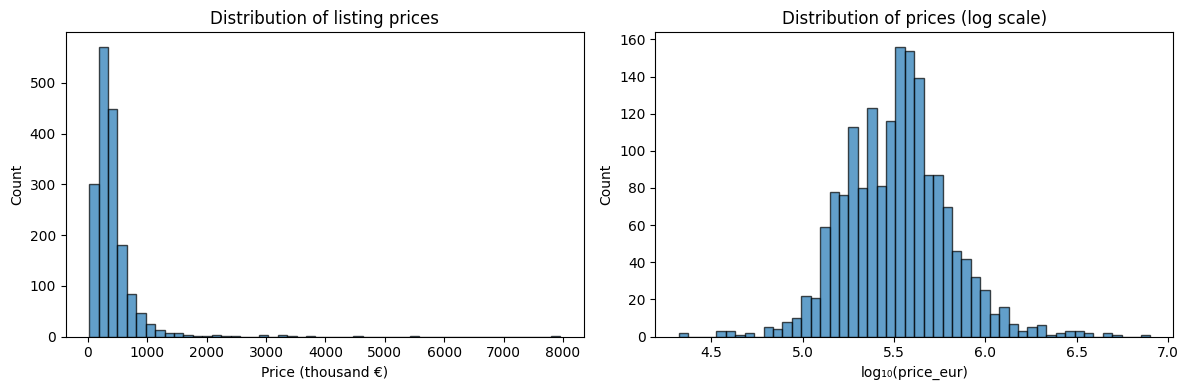

Price percentiles (€):
0.01      70390.8
0.05     126000.0
0.25     210000.0
0.50     333000.0
0.75     479500.0
0.95     950000.0
0.99    2146000.0
Name: price_eur, dtype: float64


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
price_ok = df["price_eur"].dropna()
price_ok = price_ok[price_ok > 0]
axes[0].hist(price_ok / 1_000, bins=50, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Price (thousand €)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of listing prices")

# Log scale to see shape better
axes[1].hist(np.log10(price_ok), bins=50, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("log₁₀(price_eur)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of prices (log scale)")
plt.tight_layout()
plt.show()

print("Price percentiles (€):")
print(df["price_eur"].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

## 4. Location analysis

Top 20 areas by number of listings:
location
Centro, Sevilla                                             124
Nervión, Sevilla                                            108
Palmas Altas, Sevilla                                        72
Gran Plaza - Marqués de Pickman - Ciudad Jardín, Sevilla     55
Sevilla este, Sevilla                                        43
Arenal - Museo - Tetuán, Sevilla                             41
Cerro Amate, Sevilla                                         40
Avenida de las Ciencias, Sevilla                             39
Torreblanca, Sevilla                                         37
Macarena, Sevilla                                            35
Triana, Sevilla                                              34
San Pablo, Sevilla                                           34
Bami - Pineda, Sevilla                                       34
Cerro del Águila, Sevilla                                    34
San Jerónimo, Sevilla                                      

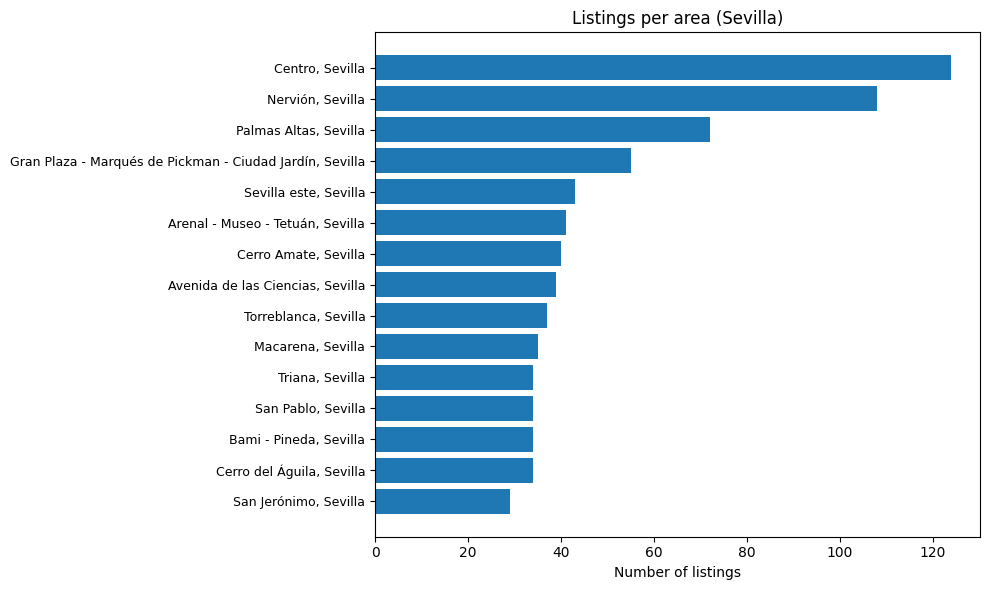

In [12]:
location_counts = df["location"].value_counts()
print("Top 20 areas by number of listings:")
print(location_counts.head(20).to_string())

fig, ax = plt.subplots(figsize=(10, 6))
top_locs = location_counts.head(15)
ax.barh(range(len(top_locs)), top_locs.values)
ax.set_yticks(range(len(top_locs)))
ax.set_yticklabels(top_locs.index, fontsize=9)
ax.invert_yaxis()
ax.set_xlabel("Number of listings")
ax.set_title("Listings per area (Sevilla)")
plt.tight_layout()
plt.show()

## 5. Rooms and surface (m²)

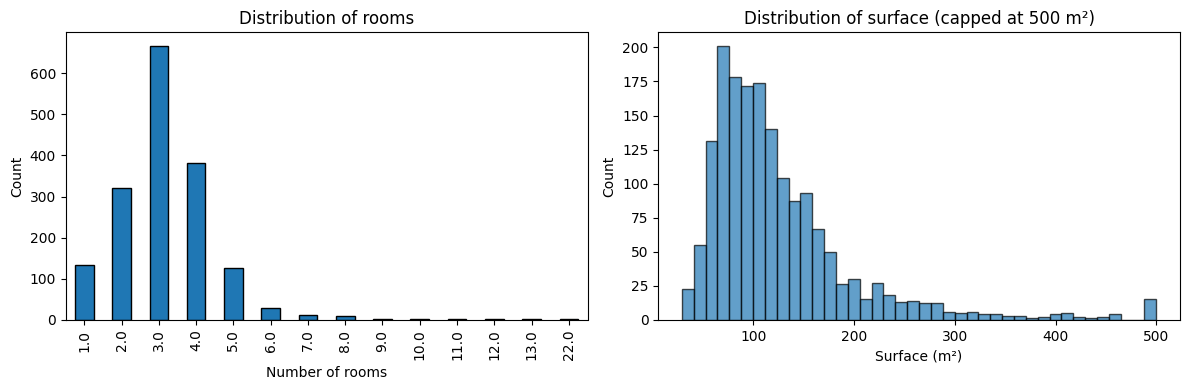

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df["rooms"].dropna().value_counts().sort_index().plot(kind="bar", ax=axes[0], edgecolor="black")
axes[0].set_xlabel("Number of rooms")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of rooms")

axes[1].hist(df["sq_meters"].dropna().clip(upper=500), bins=40, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("Surface (m²)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of surface (capped at 500 m²)")
plt.tight_layout()
plt.show()

## 6. Price by area (top 15 areas)

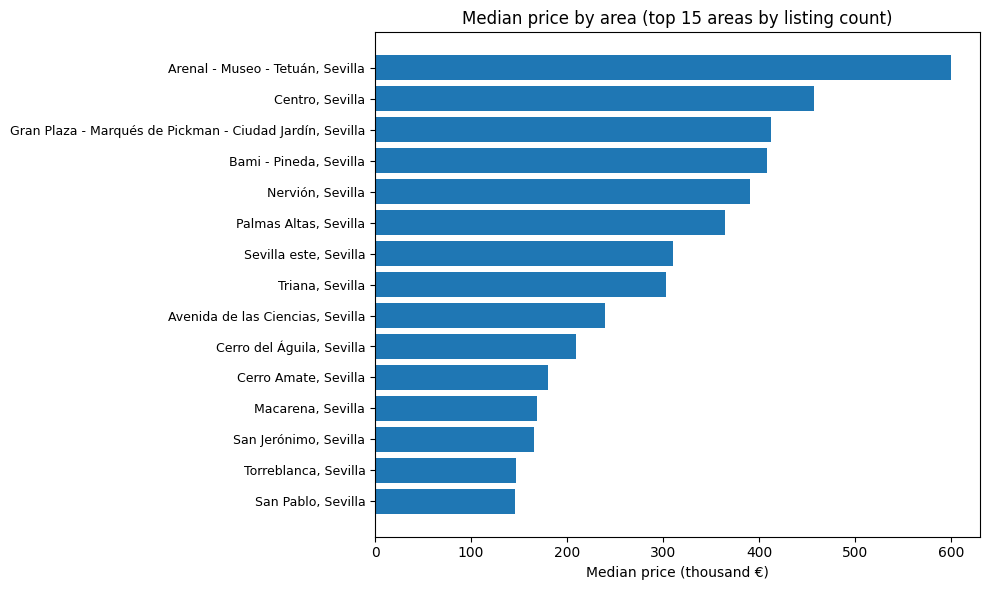


Median price by area (top 15, thousand €):
location
Calle Alisios, Reina Mercedes - Heliópolis, Sevilla           2150
Calle Alfonso XII, 1, Arenal - Museo - Tetuán, Sevilla        1800
Alfonso XII, Plaza de la Gavidia-San Lorenzo, Sevilla         1800
Calle Torneo, San Vicente, Sevilla                            1450
Calle Álvarez Quintero, Santa Cruz - Alfalfa, Sevilla         1450
Calle Miguel Cid, Plaza de la Gavidia-San Lorenzo, Sevilla    1150
Calle Alejandro Collantes, Nervión, Sevilla                   1050
Calle Espinosa y Cárcel, Nervión, Sevilla                      950
Plaza de Cuba - República Argentina, Sevilla                   950
Ronda de Capuchinos, San Julián, Sevilla                       855
Calle Albareda, 22, Arenal - Museo - Tetuán, Sevilla           848
Calle San Vicente, San Vicente, Sevilla                        835
Cuesta del Rosario, Santa Cruz - Alfalfa, Sevilla              770
Calle Corral del Rey, 15, Santa Cruz - Alfalfa, Sevilla        749
Calle Fel

In [14]:
top_areas = location_counts.head(15).index
subset = df[df["location"].isin(top_areas)].copy()
subset = subset[subset["price_eur"].notna() & (subset["price_eur"] > 0)]

# Median price by area (bar chart — no seaborn required)
median_by_area = df.groupby("location")["price_eur"].median().sort_values(ascending=False)
top_medians = median_by_area[median_by_area.index.isin(top_areas)].sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(top_medians)), top_medians.values / 1_000)
ax.set_yticks(range(len(top_medians)))
ax.set_yticklabels(top_medians.index, fontsize=9)
ax.set_xlabel("Median price (thousand €)")
ax.set_title("Median price by area (top 15 areas by listing count)")
plt.tight_layout()
plt.show()

print("\nMedian price by area (top 15, thousand €):")
print((median_by_area.head(15) / 1_000).round(0).astype(int).to_string())

## 7. Price per m²

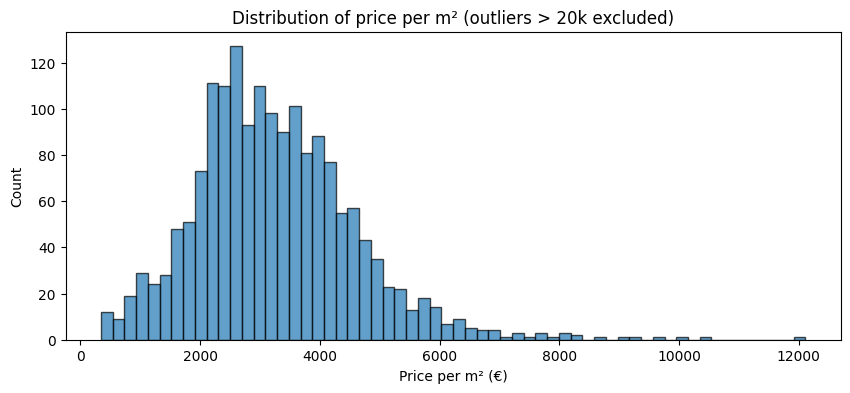

Price per m² — percentiles (€):
0.25    2357.0
0.50    3105.0
0.75    4012.0
0.90    4875.0
Name: price_per_sqm, dtype: float64


In [15]:
ppsm = df["price_per_sqm"].dropna()
ppsm = ppsm[(ppsm > 0) & (ppsm < 20000)]  # exclude extreme outliers
plt.figure(figsize=(10, 4))
plt.hist(ppsm, bins=60, edgecolor="black", alpha=0.7)
plt.xlabel("Price per m² (€)")
plt.ylabel("Count")
plt.title("Distribution of price per m² (outliers > 20k excluded)")
plt.show()

print("Price per m² — percentiles (€):")
print(df["price_per_sqm"].quantile([0.25, 0.5, 0.75, 0.9]).round(0))

## 8. Relationships: price vs rooms and surface

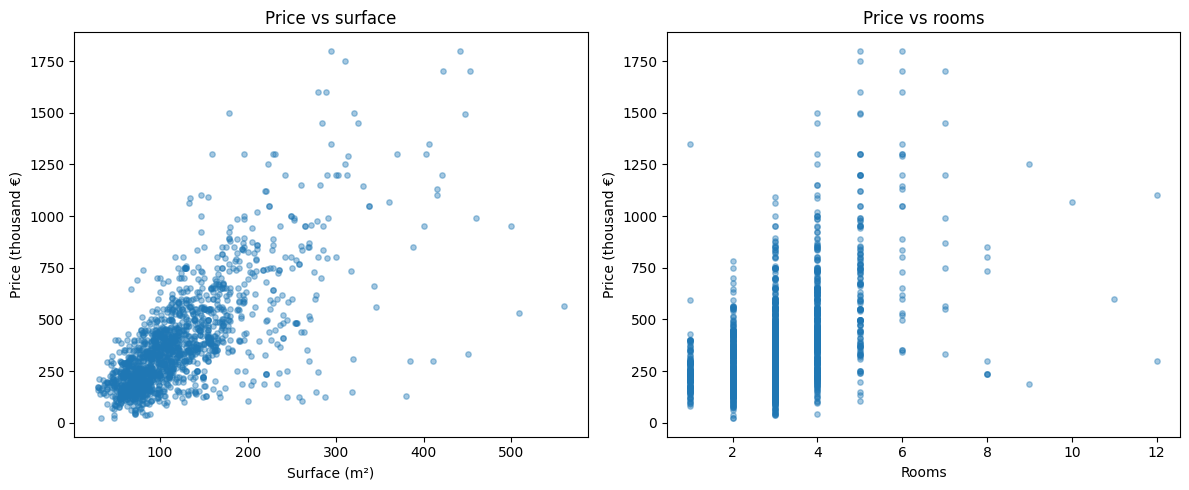

In [16]:
plot_df = df[df["price_eur"].notna() & (df["price_eur"] > 0) & (df["price_eur"] < 2_000_000)]
plot_df = plot_df[plot_df["sq_meters"].notna() & (plot_df["sq_meters"] > 0) & (plot_df["sq_meters"] < 600)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(plot_df["sq_meters"], plot_df["price_eur"] / 1_000, alpha=0.4, s=15)
axes[0].set_xlabel("Surface (m²)")
axes[0].set_ylabel("Price (thousand €)")
axes[0].set_title("Price vs surface")

axes[1].scatter(plot_df["rooms"], plot_df["price_eur"] / 1_000, alpha=0.4, s=15)
axes[1].set_xlabel("Rooms")
axes[1].set_ylabel("Price (thousand €)")
axes[1].set_title("Price vs rooms")
plt.tight_layout()
plt.show()

## 9. Tags and listing type

In [17]:
print("Listing type value counts:")
print(df["listing_type"].value_counts(dropna=False).to_string())
print("\nTags (non-null) value counts:")
print(df["tags"].value_counts(dropna=False).head(15).to_string())

Listing type value counts:
listing_type
venta    1709

Tags (non-null) value counts:
tags
NaN                       1535
Alquilada                   56
Apartamento                 36
Lujo                        31
Ocupada ilegalmente         21
Villa                        6
Nuda propiedad               6
Alquilada; Apartamento       4
En exclusiva                 3
Luminoso                     3
Loft                         2
Reformado                    1
Lujo; Villa                  1
Con vistas                   1
Cortijo                      1


## 10. Summary statistics

In [18]:
print("Total listings:", len(df))
print("Unique locations:", df["location"].nunique())
print("Price range: {:.0f} € – {:.0f} €".format(df["price_eur"].min(), df["price_eur"].max()))
print("Median price: {:.0f} €".format(df["price_eur"].median()))
print("Listings with rooms: {:.0%}".format(df["rooms"].notna().mean()))
print("Listings with sq_meters: {:.0%}".format(df["sq_meters"].notna().mean()))
print("Listings with description: {:.0%}".format(df["description"].notna().mean()))

Total listings: 1709
Unique locations: 204
Price range: 21000 € – 7956927 €
Median price: 333000 €
Listings with rooms: 99%
Listings with sq_meters: 100%
Listings with description: 100%


## 11. Focus: 3+ rooms and central Sevilla

Seville is divided into **11 districts** and 108 neighbourhoods. The most central areas are ([source: Wikipedia](https://en.wikipedia.org/wiki/Districts_and_neighbourhoods_of_Seville)):

- **Casco Antiguo** (old town / city centre): Santa Cruz, Santa Catalina, San Vicente, San Lorenzo, San Gil, Museo, Arenal, Alfalfa, San Bartolomé, Feria, Encarnación-Regina, etc. — Cathedral, Alcázar, Torre del Oro.
- **Triana** — west bank of the Guadalquivir, traditional and well connected to the centre.
- **Macarena** — north of Casco Antiguo, historic (city walls, Basilica).
- **Nervión** — east of centre; second focal point of the city, Santa Justa station, commercial hub.
- **Distrito Sur** — south of Casco Antiguo: María Luisa, Prado, Parque de María Luisa, Plaza de España.
- **Los Remedios** — west bank, south of Triana; Feria de Abril area.

Below we filter listings with **3 or more rooms** and flag **central** areas using these districts/neighbourhoods.

In [ ]:
# Central Sevilla: keywords matching district/neighbourhood names (from Wikipedia)
CENTRAL_KEYWORDS = [
    "Centro", "Santa Cruz", "Arenal", "Museo", "Tetuán", "Alfalfa", "San Vicente",
    "San Lorenzo", "San Gil", "Macarena", "Triana", "Nervión", "Nervion",
    "María Luisa", "Maria Luisa", "Prado", "Remedios", "Encarnación", "Feria",
    "Santa Catalina", "Regina", "Buhaira", "San Bartolomé", "Santa Cruz",
]

def is_central(loc):
    if pd.isna(loc):
        return False
    loc = str(loc)
    return any(kw.lower() in loc.lower() for kw in CENTRAL_KEYWORDS)

# Filter: 3 or more rooms (and ensure numeric)
df["rooms"] = pd.to_numeric(df["rooms"], errors="coerce")
df_3plus = df[df["rooms"] >= 3].copy()
df_3plus["is_central"] = df_3plus["location"].map(is_central)

print("Listings with 3+ rooms:", len(df_3plus))
print("Of these, in central areas:", df_3plus["is_central"].sum())
print("Share of 3+ rooms in central areas: {:.1%}".format(df_3plus["is_central"].mean()))
print("\nCentral areas (3+ rooms) — value counts:")
print(df_3plus.loc[df_3plus["is_central"], "location"].value_counts().head(20).to_string())

### 11.1 Central areas (3+ rooms): count and median price per area

In [ ]:
# Ensure price_per_sqm exists for df_3plus (from df)
if "price_per_sqm" not in df_3plus.columns:
    df_3plus["price_per_sqm"] = np.where(
        df_3plus["sq_meters"].gt(0),
        df_3plus["price_eur"] / df_3plus["sq_meters"],
        np.nan,
    )

central_3plus = df_3plus[df_3plus["is_central"]].copy()
by_area = central_3plus.groupby("location").agg(
    count=("price_eur", "count"),
    median_price_eur=("price_eur", "median"),
    median_price_per_sqm=("price_per_sqm", "median"),
    median_rooms=("rooms", "median"),
    median_sqm=("sq_meters", "median"),
).sort_values("count", ascending=False)

by_area["median_price_k"] = (by_area["median_price_eur"] / 1_000).round(0)
by_area["median_ppsm"] = by_area["median_price_per_sqm"].round(0)
print("Central areas — 3+ rooms: count, median price (€), median price/m², median rooms, median m²")
display(by_area[["count", "median_price_k", "median_ppsm", "median_rooms", "median_sqm"]].head(20))

### 11.2 Price comparison: central vs non-central (3+ rooms)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Price distribution
for label, subset in [("Central", df_3plus[df_3plus["is_central"]]), ("Non-central", df_3plus[~df_3plus["is_central"]])]:
    prices = subset["price_eur"].dropna()
    prices = prices[(prices > 0) & (prices < 1_500_000)]
    axes[0].hist(prices / 1_000, bins=40, alpha=0.6, label=label)
axes[0].set_xlabel("Price (thousand €)")
axes[0].set_ylabel("Count")
axes[0].set_title("Price distribution — 3+ rooms")
axes[0].legend()

# Median price by central vs non-central
summary = df_3plus.groupby("is_central").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_ppsm=("price_per_sqm", "median"),
)
summary.index = ["Non-central", "Central"]
axes[1].barh(summary.index, summary["median_price"] / 1_000)
axes[1].set_xlabel("Median price (thousand €)")
axes[1].set_title("Median price — 3+ rooms")
plt.tight_layout()
plt.show()

print("Summary — 3+ rooms:")
print(summary[["count", "median_price", "median_ppsm"]].round(0))

### 11.3 Median price by central area (top 12, 3+ rooms)

In [ ]:
# Bar chart: median price by central area (3+ rooms, top 12 by count)
top_central = by_area.head(12)
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(top_central))
ax.barh(y_pos, top_central["median_price_eur"] / 1_000)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_central.index, fontsize=9)
ax.set_xlabel("Median price (thousand €)")
ax.set_title("Central Sevilla — 3+ rooms: median price by area (top 12)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()